In [1]:
import sys
sys.path.append('/Users/cheng/Google Drive/PhD/Research/Portfolio Selection via TBN/codes/')
import warnings
warnings.filterwarnings("ignore")
from module.backtesting import vectorized_backtesting
from module.environment_with_new_bt import market_environment
from module.agent_network_new import DQNAgent
from module.RL_trainer import training, testing, is_converge
import pandas as pd
import numpy as np
from tqdm import tqdm
import tensorflow as tf
import matplotlib.pyplot as plt

In [15]:
# hyper-parameter
np.random.seed(2021)
tf.random.set_seed(1234)
window_size = 4
year_start = 2005
year_end = 2017
year_range = np.arange(year_start, year_end+1)
training_idx_list = [np.arange(year, year + window_size, 1) for year in year_range[:-window_size]]
performance_df = pd.DataFrame()

# training
for training_years in training_idx_list:
    # training
    agent, history = training(training_years)

    # testing
    testing_period = np.append(training_years, training_years[-1] + 1)
    performance = testing(testing_period, agent)

    # store performance data
    performance_test = pd.DataFrame(performance)
    performance_df = pd.concat([performance_df, performance_test])

 75%|███████▌  | 750/1000 [07:03<02:21,  1.77it/s]

Converged on episode 751



 20%|██        | 200/1000 [01:40<06:43,  1.98it/s]

Converged on episode 201



 90%|█████████ | 900/1000 [08:12<00:54,  1.83it/s]

Converged on episode 901



 70%|███████   | 700/1000 [06:20<02:43,  1.84it/s]

Converged on episode 701


In [18]:
RL_id_df = pd.concat([df,performance_df])
RL_id_df

,year,action,reward,turnover
0,2001,0.0,-0.234505,0.350673
0,2002,0.1,-0.549552,0.394568
0,2003,0.1,1.675664,0.333814
0,2004,0.7,1.220477,0.755806
0,2005,0.8,0.406161,0.008312
0,2006,0.7,1.199334,0.009211
0,2007,0.3,0.391864,0.119553
0,2008,0.3,-0.651304,0.621683
0,2009,0.3,1.039701,0.657197
0,2010,0.8,0.881759,0.042713


In [20]:
RL_id_df.to_csv('/Users/cheng/Google Drive/PhD/Research/Portfolio Selection via TBN/output/data/RL_identity_ts.csv', index=False)

In [14]:
df = pd.concat([performance_df_1, performance_df_2, performance_df_3, performance_df_4])
df.to_csv('/Users/cheng/Google Drive/PhD/Research/Portfolio Selection via TBN/output/data/RL_identity_ts_2001_2008.csv', index=False)

## Debuging

In [2]:
# initialize environment and agent
year_start = 1997
year_end = 2017
year_range = np.arange(year_start, year_end+1)
env = market_environment(year_range)
ACTION_MAPPING = env.ACTION_MAPPING
state_size = env.observation_space.shape[1] # given from environment
action_size = len(ACTION_MAPPING)
agent = DQNAgent(state_size, action_size)
EPISODE_RANGE = 1000
batch_size = 6
converge = False
window_size = 50
history = {'episode': [], "epsilon": [],'rewards': []}
path = '../log/'
model_name = 'DQN_'

In [3]:
state = env.reset()
rewards = 0

In [4]:
action = agent.act(state) 

# environment responds to the action and return new state and reward
next_state, reward, done, info = env.step(ACTION_MAPPING[action])

# record reward
rewards += reward

# record the experience for replay
agent.memorize(state, action, reward, next_state, done) # record every trading 

# transit to next state
state = next_state

In [5]:
len(env.portfolio[0].tolist())

42

In [8]:
# initialize environment and agent
env = market_environment(year_range)
ACTION_MAPPING = env.ACTION_MAPPING
state_size = env.observation_space.shape[1] # given from environment
action_size = len(ACTION_MAPPING)
agent = DQNAgent(state_size, action_size)
EPISODE_RANGE = 1000
batch_size = 6
converge = False
window_size = 50
history = {'episode': [], "epsilon": [],'rewards': []}
path = '../log/'
model_name = 'DQN_'

In [10]:
file_path = '/Users/cheng/Google Drive/PhD/Research/Portfolio Selection via TBN/output/table/RL_performance_50_tbn.csv'
performance_df.to_csv(file_path)


In [3]:
training_years = training_idx_list[0]
agent, history = training(training_years)



100%|██████████| 1000/1000 [09:51<00:00,  1.69it/s]


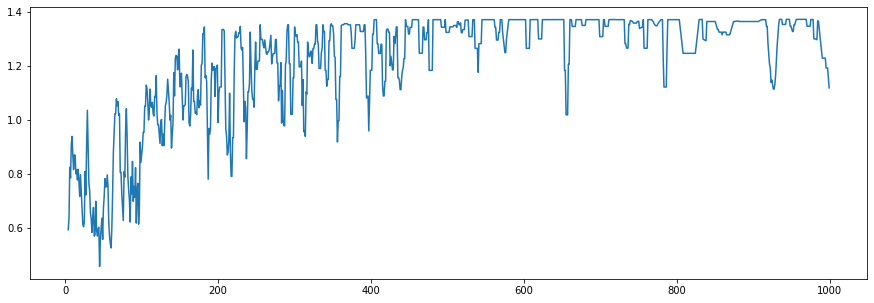

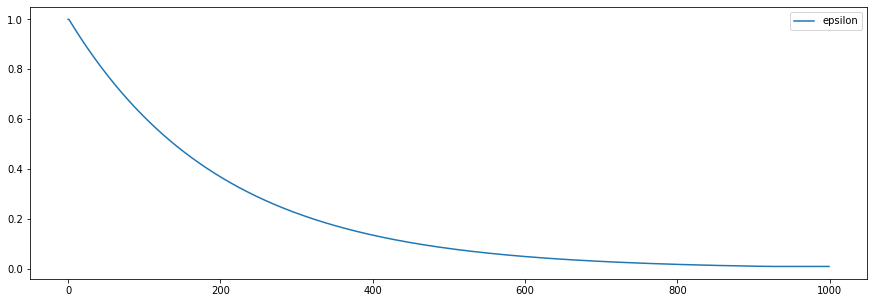

In [3]:
df = pd.DataFrame(history, columns =["episode", "epsilon",'rewards'])
df.set_index("episode")
df['rewards'].rolling(5).mean().plot(figsize=(15,5))
plt.show()

df[["epsilon"]].plot(figsize=(15,5))
plt.show()

In [23]:
# take an action
action = agent.act(state) 

# environment responds to the action and return new state and reward
next_state, reward, done, info = env.step(ACTION_MAPPING[action])

# record reward
rewards += reward

# record the experience for replay
agent.memorize(state, action, reward, next_state, done) # record every trading 

# transit to next state
state = next_state

# determine if the training is over or not
if done:
    print('done')

done
